In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Cargar los datos
data = pd.read_csv('clustering_data.csv')

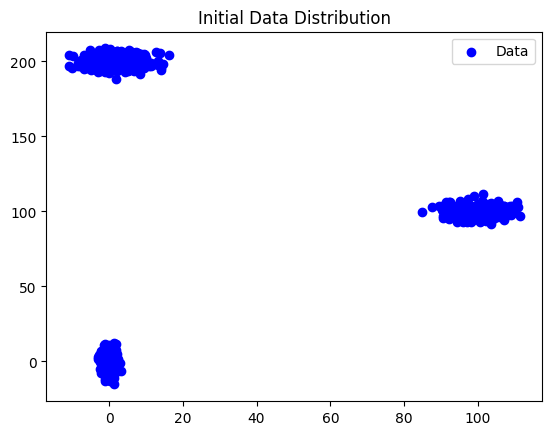

In [22]:
# Visualizar los datos
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c='blue', label='Data')
plt.title('Initial Data Distribution')
plt.legend()
plt.show()

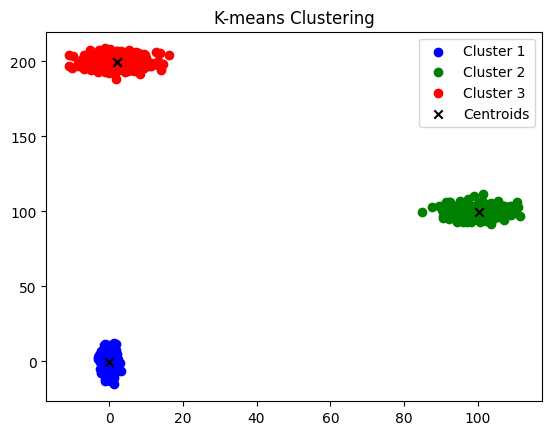

In [31]:
# Inicializar aleatoriamente 3 centroides
np.random.seed(42)  # Para reproducibilidad
k = 3
centroids = data.sample(n=k).to_numpy()

# Función para la distancia euclidiana
def euclidean_distance(a, b):
    return np.linalg.norm(a - b)

# Funición para algoritmo K-means
def kmeans(data, centroids, k):
    data_np = data.to_numpy()
    n_samples = data_np.shape[0]
    labels = np.zeros(n_samples)
    while True:
        
        # E-Step: Asignar cada punto al centroide más cercano
        for i in range(n_samples):
            distances = [euclidean_distance(data_np[i], centroid) for centroid in centroids]
            labels[i] = np.argmin(distances)
            
        # M-Step: Recalcular los centroides
        new_centroids = np.array([data_np[labels == j].mean(axis=0) for j in range(k)])
        
        # Verificar si los centroides han cambiado
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    
    return centroids, labels
    
# Ejecutar K-means
final_centroids, labels = kmeans(data, centroids, k)

# Visualizar los resultados
colors = ['blue', 'green', 'red']
for i in range(k):
    points = data.to_numpy()[labels == i]
    plt.scatter(points[:, 0], points[:, 1], c=colors[i], marker='o', label=f'Cluster {i+1}')
    plt.scatter(final_centroids[i, 0], final_centroids[i, 1], c='black', marker='x')
plt.scatter(final_centroids[i, 0], final_centroids[i, 1], c='black', marker='x', label='Centroids')
plt.title('K-means Clustering')
plt.legend()
plt.show()